<a href="https://colab.research.google.com/github/estevaovukelic/Stock_price_Magalu/blob/main/Analisando_Pre%C3%A7os_das_A%C3%A7%C3%B5es_da_Magazine_Luiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de Preços das Ações do Magazine Luiza

#### ***Importando dados históricos desde 05/2011 data inicial do ativo até data atual***.

https://finance.yahoo.com/quote/MGLU3.SA?p=MGLU3.SA


In [412]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [413]:
import pandas as pd
import numpy as np


In [414]:
import plotly
import plotly.offline as py

In [415]:
from plotly.offline import plot, iplot
plotly.offline.init_notebook_mode(connected=True)

In [416]:
from pandas_datareader import data as wb

In [470]:
df = wb.DataReader('MGLU3.SA', data_source='yahoo', start=('2011-5-1'))

In [471]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-05-02,0.518750,0.503125,0.503125,0.514062,280003200.0,0.463509
2011-05-03,0.521562,0.506250,0.515625,0.509375,33670400.0,0.459283
2011-05-04,0.515000,0.510000,0.510000,0.515000,39203200.0,0.464355
2011-05-05,0.512812,0.510000,0.512812,0.511875,35097600.0,0.461537
2011-05-06,0.511875,0.500000,0.510937,0.508125,38672000.0,0.458156


In [472]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-28,26.50,25.389999,25.870001,26.190001,32819900.0,26.190001
2021-01-29,26.08,25.200001,25.740000,25.559999,25566400.0,25.559999
2021-02-01,25.74,24.750000,25.680000,24.930000,29267700.0,24.930000
2021-02-02,25.73,25.200001,25.299999,25.299999,27563200.0,25.299999
2021-02-03,25.77,25.040001,25.440001,25.650000,20963300.0,25.650000


### Caso queira, criar e salvar o arquivo csv no Drive Colab.

In [420]:
df.to_csv('/content/drive/My Drive/AnaliseBolsa/df_magalu.csv')

In [421]:
df = pd.read_csv('/content/drive/My Drive/AnaliseBolsa/df_magalu.csv')

In [422]:
df.rename(columns={'Date': 'Data', 'High': 'Máxima', 'Low':'Mínima', 'Open': 'Abertura','Close':'Fechamento','Adj Close':'Fechamento_Aj'}, inplace = True)

In [423]:
df.head()

,Data,Máxima,Mínima,Abertura,Fechamento,Volume,Fechamento_Aj
0,2011-05-02,0.518750,0.503125,0.503125,0.514062,280003200.0,0.463509
1,2011-05-03,0.521562,0.506250,0.515625,0.509375,33670400.0,0.459283
2,2011-05-04,0.515000,0.510000,0.510000,0.515000,39203200.0,0.464355
3,2011-05-05,0.512812,0.510000,0.512812,0.511875,35097600.0,0.461537
4,2011-05-06,0.511875,0.500000,0.510937,0.508125,38672000.0,0.458156


In [424]:
df.tail()

,Data,Máxima,Mínima,Abertura,Fechamento,Volume,Fechamento_Aj
2415,2021-01-28,26.50,25.389999,25.870001,26.190001,32819900.0,26.190001
2416,2021-01-29,26.08,25.200001,25.740000,25.559999,25566400.0,25.559999
2417,2021-02-01,25.74,24.750000,25.680000,24.930000,29267700.0,24.930000
2418,2021-02-02,25.73,25.200001,25.299999,25.299999,27563200.0,25.299999
2419,2021-02-03,25.77,25.040001,25.440001,25.650000,20963300.0,25.650000


In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Data           2420 non-null   object 
 1   Máxima         2420 non-null   float64
 2   Mínima         2420 non-null   float64
 3   Abertura       2420 non-null   float64
 4   Fechamento     2420 non-null   float64
 5   Volume         2420 non-null   float64
 6   Fechamento_Aj  2420 non-null   float64
dtypes: float64(6), object(1)
memory usage: 132.5+ KB


#### ***Remover as colunas Volume e Fechamento_Aj***

In [426]:
df = df.drop(columns=['Volume','Fechamento_Aj'])

In [427]:
df.isnull().sum()

Data          0
Máxima        0
Mínima        0
Abertura      0
Fechamento    0
dtype: int64

In [428]:
df[['Data','Máxima','Mínima','Abertura','Fechamento']].replace(0,np.NAN)

,Data,Máxima,Mínima,Abertura,Fechamento
0,2011-05-02,0.518750,0.503125,0.503125,0.514062
1,2011-05-03,0.521562,0.506250,0.515625,0.509375
2,2011-05-04,0.515000,0.510000,0.510000,0.515000
3,2011-05-05,0.512812,0.510000,0.512812,0.511875
4,2011-05-06,0.511875,0.500000,0.510937,0.508125
...,...,...,...,...,...
2415,2021-01-28,26.500000,25.389999,25.870001,26.190001
2416,2021-01-29,26.080000,25.200001,25.740000,25.559999
2417,2021-02-01,25.740000,24.750000,25.680000,24.930000
2418,2021-02-02,25.730000,25.200001,25.299999,25.299999


In [429]:
df.isnull().sum()

Data          0
Máxima        0
Mínima        0
Abertura      0
Fechamento    0
dtype: int64

### **Para visualização da série de dados.**

In [430]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [431]:
pio.renderers.default = "colab"

### **Gráfico com os preços de fechamento da ação Magalu**

In [432]:
import plotly.graph_objs as go
data = [go.Scatter(
          x=df.Data,
          y=df['Fechamento'],
          line = dict(color = 'blue'),
          opacity = 0.8)]
layout = dict(
    title = "Preços de Fechamento - Magalu",
    title_x= 0.5)

fig = dict(data=data, layout=layout)
py.iplot(fig)


**Controle deslizante: selecione o período desejado e para retornar, clique duas vezes sobre o gráfico.**

### **Gráfico em candlesticks da ação Magalu**

In [433]:
trace = go.Candlestick(x=df['Data'],
                open=df['Abertura'],
                high=df['Máxima'],
                low=df['Mínima'],
                close=df['Fechamento'])

layout = go.Layout(
    title ='Preços das ações Magalu desde de Maio/11 em Candlesticks' ,
    title_x = 0.5,
    xaxis = dict(
        rangeslider = dict(
            visible = False)
        )
    )

data = [trace]

fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

**Selecione área desejada no gráfico para obter o zoom e para retorna clique duas vezes**

## ***Cálculo da Taxa de Retorno Simples***


In [434]:
df.head()

,Data,Máxima,Mínima,Abertura,Fechamento
0,2011-05-02,0.518750,0.503125,0.503125,0.514062
1,2011-05-03,0.521562,0.506250,0.515625,0.509375
2,2011-05-04,0.515000,0.510000,0.510000,0.515000
3,2011-05-05,0.512812,0.510000,0.512812,0.511875
4,2011-05-06,0.511875,0.500000,0.510937,0.508125


In [435]:
df.tail()

,Data,Máxima,Mínima,Abertura,Fechamento
2415,2021-01-28,26.50,25.389999,25.870001,26.190001
2416,2021-01-29,26.08,25.200001,25.740000,25.559999
2417,2021-02-01,25.74,24.750000,25.680000,24.930000
2418,2021-02-02,25.73,25.200001,25.299999,25.299999
2419,2021-02-03,25.77,25.040001,25.440001,25.650000


### Taxa média de **retorno simples diário**.

In [436]:
df['Retorno_Simples'] = (df['Fechamento'] / df['Fechamento'].shift(1)) - 1
print (df['Retorno_Simples'])

0            NaN
1      -0.009118
2       0.011043
3      -0.006068
4      -0.007326
          ...   
2415    0.015510
2416   -0.024055
2417   -0.024648
2418    0.014842
2419    0.013834
Name: Retorno_Simples, Length: 2420, dtype: float64


In [437]:
import plotly.graph_objs as go
data = [go.Scatter(
          x=df.Data,
          y=df['Retorno_Simples'],
          line = dict(color = 'brown'),
          opacity = 0.6)]
layout = dict(
    title = "Evolução da taxa de retorno simples diária - Magalu",
    title_x= 0.5)

fig = dict(data=data, layout=layout)
py.iplot(fig)


In [438]:
Md_Retorno_Simples_d = df['Retorno_Simples'].mean()
Md_Retorno_Simples_d

0.0023043133073271972

In [439]:
print ('Taxa Média de Retorno Simples Diário: ',str(round(Md_Retorno_Simples_d, 3)) + ' %')

Taxa Média de Retorno Simples Diário:  0.002 %


### Taxa média de **retorno simples anual**. 

#### *Dias úteis ao ano ≅ 250*

In [440]:
Md_Retorno_Simples_y = df['Retorno_Simples'].mean() * 250 * 100

In [441]:
print ('Taxa Média de Retorno Simples Anual: ',str(round(Md_Retorno_Simples_y, 2)) + ' %')

Taxa Média de Retorno Simples Anual:  57.61 %


### Desvio padrão da taxa média de **Retorno Simples Anual** . 

In [442]:
Dispersao = df['Retorno_Simples'].std()*250**0.5 
Dispersao


0.5937650762116414

In [443]:
print ('Dispersão: ',str(round(Dispersao, 2)) + ' %')

Dispersão:  0.59 %


## ***Cálculo da Taxa de Retorno Log***


### No caso de analisarmos somente um ativo para período de longo prazo a Taxa de Retorno Log pode ser a mais recomendada. 

In [444]:
df['Retorno_Log'] = np.log(df['Fechamento'] / df['Fechamento'].shift(1))
print (df['Retorno_Log'])

0            NaN
1      -0.009159
2       0.010982
3      -0.006086
4      -0.007353
          ...   
2415    0.015391
2416   -0.024349
2417   -0.024957
2418    0.014732
2419    0.013739
Name: Retorno_Log, Length: 2420, dtype: float64


In [445]:
import plotly.graph_objs as go
data = [go.Scatter(
          x=df.Data,
          y=df['Retorno_Log'],
          line = dict(color = 'green'),
          opacity = 0.8)]
layout = dict(
    title = "Evolução da taxa de retorno log diária - Magalu",
    title_x= 0.5)

fig = dict(data=data, layout=layout)
py.iplot(fig)


In [446]:
df.head()

,Data,Máxima,Mínima,Abertura,Fechamento,Retorno_Simples,Retorno_Log
0,2011-05-02,0.518750,0.503125,0.503125,0.514062,NaN,NaN
1,2011-05-03,0.521562,0.506250,0.515625,0.509375,-0.009118,-0.009159
2,2011-05-04,0.515000,0.510000,0.510000,0.515000,0.011043,0.010982
3,2011-05-05,0.512812,0.510000,0.512812,0.511875,-0.006068,-0.006086
4,2011-05-06,0.511875,0.500000,0.510937,0.508125,-0.007326,-0.007353


In [447]:
df.tail()

,Data,Máxima,Mínima,Abertura,Fechamento,Retorno_Simples,Retorno_Log
2415,2021-01-28,26.50,25.389999,25.870001,26.190001,0.015510,0.015391
2416,2021-01-29,26.08,25.200001,25.740000,25.559999,-0.024055,-0.024349
2417,2021-02-01,25.74,24.750000,25.680000,24.930000,-0.024648,-0.024957
2418,2021-02-02,25.73,25.200001,25.299999,25.299999,0.014842,0.014732
2419,2021-02-03,25.77,25.040001,25.440001,25.650000,0.013834,0.013739


### Taxa média de **retorno logarítmico diário**.

In [448]:
Md_Retorno_Log_d = df['Retorno_Log'].mean() * 100

In [449]:
print ('Taxa Média de Retorno Log Diário: ',str(round(Md_Retorno_Log_d, 2)) + ' %')

Taxa Média de Retorno Log Diário:  0.16 %


### Taxa média de **retorno logarítmico anual**.

In [450]:
Retorno_Log_y = df['Retorno_Log'].mean() * 250 * 100

In [451]:
print ('Taxa média de retorno log anual: ',str(round(Retorno_Log_y, 2)) + ' %')

Taxa média de retorno log anual:  40.41 %


In [452]:
Dispersao_Log = df['Retorno_Log'].std()*250**0.5

In [453]:
print ('Dispersão: ',str(round(Dispersao_Log, 2)) + ' %')

Dispersão:  0.58 %


 ### ***Cálculo do Indicador Beta da Ação Magalu***

In [454]:
tickers = ['MGLU3.SA', '^BVSP']

df_2 = pd.DataFrame()

for t in tickers:
    df_2[t] = wb.DataReader(t, data_source='yahoo', start='2016-1-1', end='2020-12-31')['Adj Close']    

In [455]:
df_2

,MGLU3.SA,^BVSP
Date,,
2016-01-04,0.066971,42141.0
2016-01-05,0.067642,42419.0
2016-01-06,0.061785,41773.0
2016-01-07,0.053576,40695.0
2016-01-08,0.053801,40612.0
...,...,...
2020-12-22,25.133823,116348.0
2020-12-23,24.944021,117857.0
2020-12-28,25.223730,119051.0


In [456]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1242 entries, 2016-01-04 to 2020-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MGLU3.SA  1242 non-null   float64
 1   ^BVSP     1236 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


In [457]:
df_2.describe()

,MGLU3.SA,^BVSP
count,1242.000000,1236.000000
mean,6.086001,80404.696602
std,6.958038,19794.079568
min,0.047234,37497.000000
25%,0.709586,64207.250000
50%,3.602048,79357.000000
75%,8.926893,97371.750000
max,27.421442,119528.000000


In [458]:
df_3 = np.log(df2 / df2.shift(1))
print (df_3)

      MGLU3.SA     ^BVSP
0          NaN       NaN
1     0.009976  0.006575
2    -0.090581 -0.015346
3    -0.142549 -0.026145
4     0.004181 -0.002042
...        ...       ...
1237  0.006380  0.002858
1238 -0.007580  0.012886
1239  0.011151  0.010080
1240  0.001187  0.003555
1241 -0.012099 -0.001416

[1242 rows x 2 columns]


In [459]:
cov = df_3.cov()*250
print(cov)

          MGLU3.SA     ^BVSP
MGLU3.SA  0.378300  0.093058
^BVSP     0.093058  0.079600


In [460]:
covmerc = cov.iloc[0,1]
covmerc

0.0930578774897396

In [461]:
varmerc = df_3['^BVSP'].var() * 250
varmerc

0.07959961415643746

In [462]:
beta = covmerc/varmerc
beta

1.1690744795176087

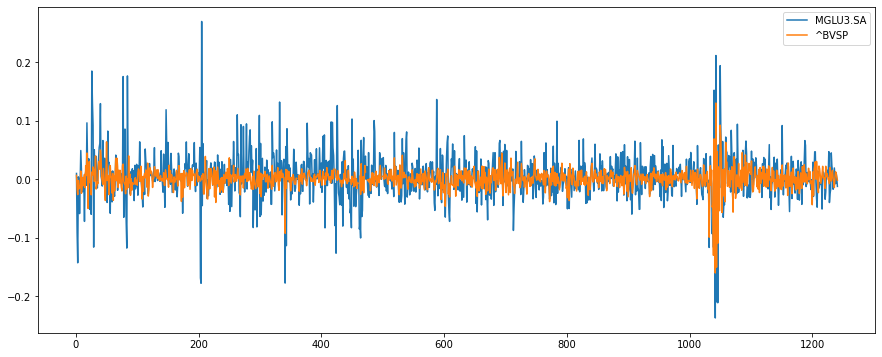

In [463]:
df_3.plot(figsize=(15,6))
plt.show()

In [464]:
print("""Índice BETA quando:\n
    maior que 1 = AGRESSIVO\n
    menor que 1 = DEFENSIVO\n
    igual a 1 = NEUTRO\n""")

if beta  >  1:
  print('O índice BETA de {} da ação Magalu é considerado AGRESSIVO'.format(round(beta,2)))
elif beta < 1:
 print('O índice BETA de {} da ação Magalu é considerado DEFENSIVO'.format(round(beta,2)))
elif beta == 1:
  print('O índice BETA de {} da ação Magalu é considerado NEUTRO'.format(round(beta,2)))


Índice BETA quando:

    maior que 1 = AGRESSIVO

    menor que 1 = DEFENSIVO

    igual a 1 = NEUTRO

O índice BETA de 1.17 da ação Magalu é considerado AGRESSIVO


### O índice Beta estima o risco relativo de uma ação comparando ao mercado. Devemos utilizar outros índicadores além do índice Beta a fim de obtermos uma avaliação mais consistente da ação. 
